# Non-Negative ICA Applications

 The notebok goes through a 2D and a 3D case study and demonstrates how to use the provided nn_ica algorithm. It also comes with a simple plotting function for the results. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, '../nn_ica/')
from main import *

%load_ext autoreload
%autoreload 2

# Simple 3D Data

In [6]:
np.random.seed(2)
n = 3

# it works if the second source is 3, 3
s_1 = np.random.beta(1, 1, 1000)
s_2 = np.random.beta(3, 3, 1000)
s_3 = np.random.beta(2, 4, 1000)
S = np.array(np.concatenate((s_1[None, :], s_2[None, :], s_3[None, :]), axis=0))

# make the data unit variance
S = np.diag(1/np.std(S, axis=1)) @ S

# create A and X
A = np.random.normal(0, 10, (n, n))
X = A @ S
S.shape, A.shape, X.shape

((3, 1000), (3, 3), (3, 1000))

In [8]:
Y, W, Z, t_max_arr = run_nn_ica(X, t_tol=1)

i = 0, t_max = 3614.29, ixs = [0, 1], #negative = 2106
i = 2, t_max = 0.96, ixs = [0, 1], #negative = 5
Converged. Returning the reconstruction.


Plot the reconstruction:

../nn_ica/main.py:335: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


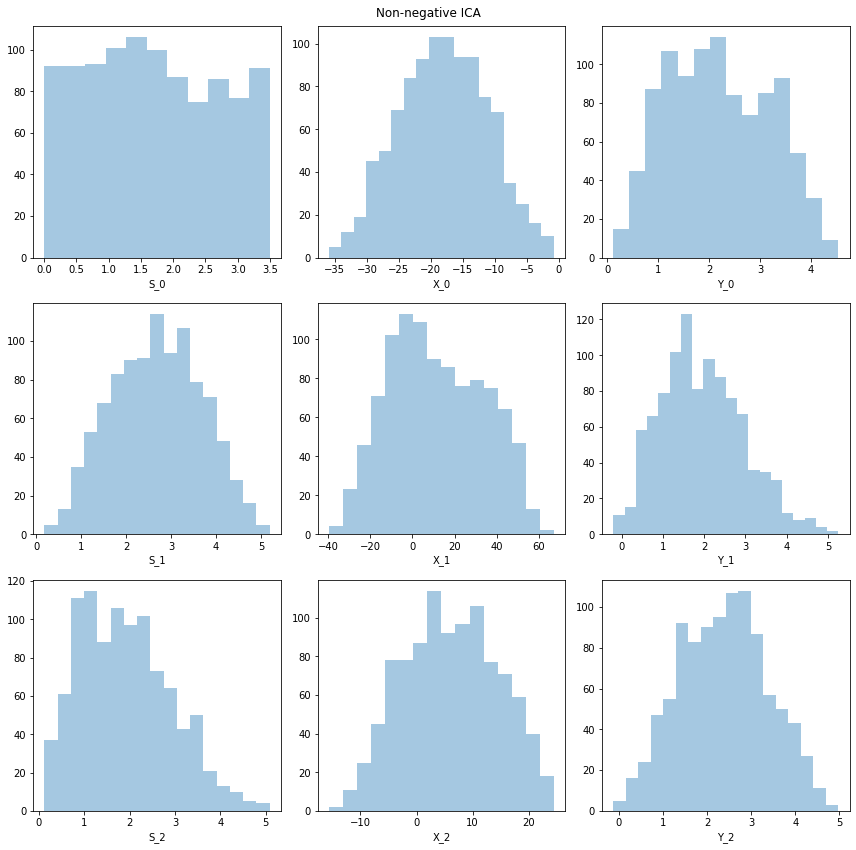

In [11]:
plot_ica_reconstruction([S, X, Y], labels=['S', 'X', 'Y'])

This is fairly similar to what we had before. Let's vary the sources slightly and try again.

i = 0, t_max = 715.12, ixs = [1, 2], #negative = 2398
i = 14, t_max = 0.75, ixs = [1, 2], #negative = 11
Converged. Returning the reconstruction.


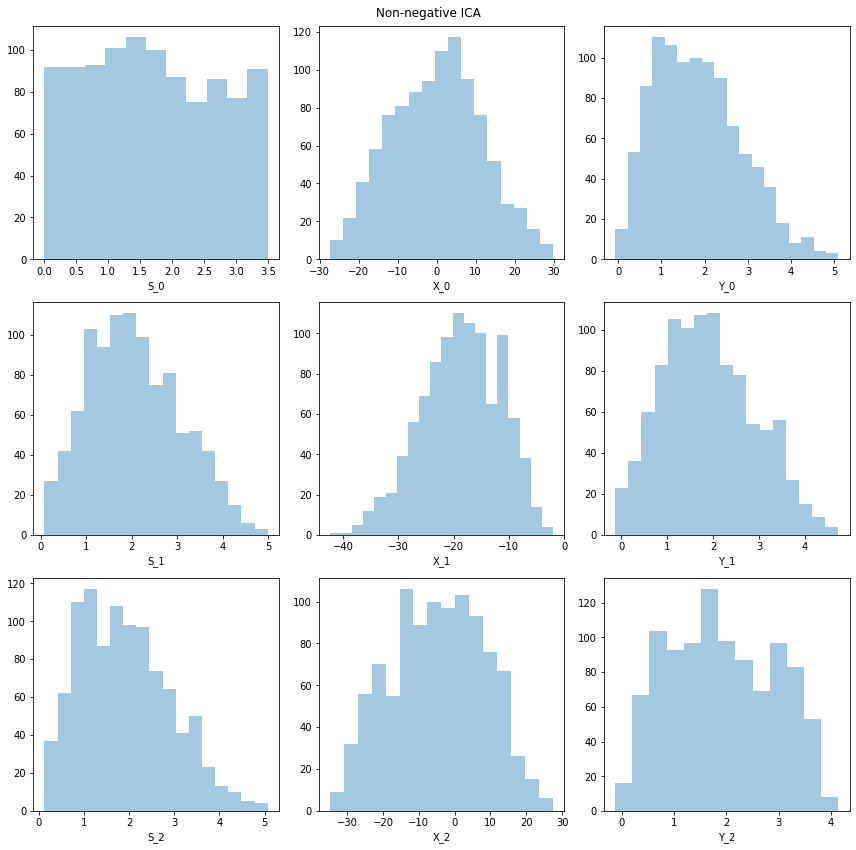

In [12]:
np.random.seed(2)
n = 3

# it works if the second source is 3, 3
s_1 = np.random.beta(1, 1, 1000)
s_2 = np.random.beta(2, 3, 1000)
s_3 = np.random.beta(2, 4, 1000)
S = np.array(np.concatenate((s_1[None, :], s_2[None, :], s_3[None, :]), axis=0))

# make the data unit variance
S = np.diag(1/np.std(S, axis=1)) @ S

# create A and X
A = np.random.normal(0, 10, (n, n))
X = A @ S
S.shape, A.shape, X.shape

# run the algorithm and plot
Y, W, Z, t_max_arr = run_nn_ica(X, t_tol=1)
plot_ica_reconstruction([S, X, Y], labels=['S', 'X', 'Y'])

Let's check how many negative elements are still present.

In [13]:
np.sum(Y < 0)

11

In [14]:
Y.shape

(3, 1000)

So this was succesful for most, but not absolutely all elements. Let's see what happens when we decrease the tolerance on the torque:

In [15]:
Y, W, Z, t_max_arr = run_nn_ica(X, t_tol=1e-2, i_max=1e5, print_all=5000)

i = 0, t_max = 715.12, ixs = [1, 2], #negative = 2398
i = 5000, t_max = 0.16, ixs = [0, 2], #negative = 6
i = 10000, t_max = 0.04, ixs = [1, 2], #negative = 7
i = 15000, t_max = 0.06, ixs = [1, 2], #negative = 5
i = 18796, t_max = 0.00, ixs = [0, 1], #negative = 3
Converged. Returning the reconstruction.


This does converge when t_tol is 1e-2, but it does not when it's 1e-3. I tried using up to half a million iterations.

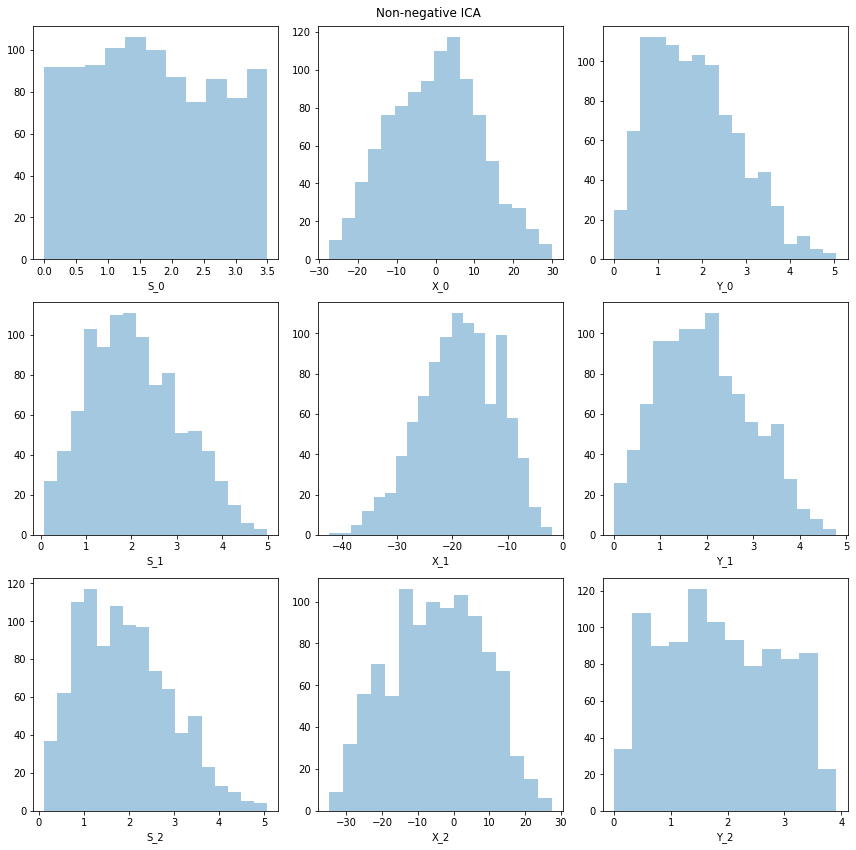

In [16]:
plot_ica_reconstruction([S, X, Y], labels=['S', 'X', 'Y'])

Let's check how many elements in Y are still negative:

In [17]:
np.sum(Y<0)

3

# More Challenging 3D Sources

Let's generate some higher dimensional data to check the performance, with some more interesting densities.

In [18]:
np.random.seed(2)
sources = []
sources.append(np.concatenate( (np.random.beta(1, 1, 1000),  np.random.beta(3, 3, 1000)) ))
sources.append(np.concatenate((np.random.beta(1, 3, 1000),  np.random.normal(10, 1, 1000))))
sources.append(np.concatenate((np.random.beta(1, 4, 1000),  2+np.random.exponential(1, 1000))))
n = len(sources)

In [19]:
S = np.concatenate([s[None, :] for s in sources], axis=0)
S = np.diag(1/np.std(S, axis=1)) @ S
S.shape

(3, 2000)

In [20]:
A = np.random.normal(0, 10, (n, n))
X = A @ S
S.shape, A.shape, X.shape

((3, 2000), (3, 3), (3, 2000))

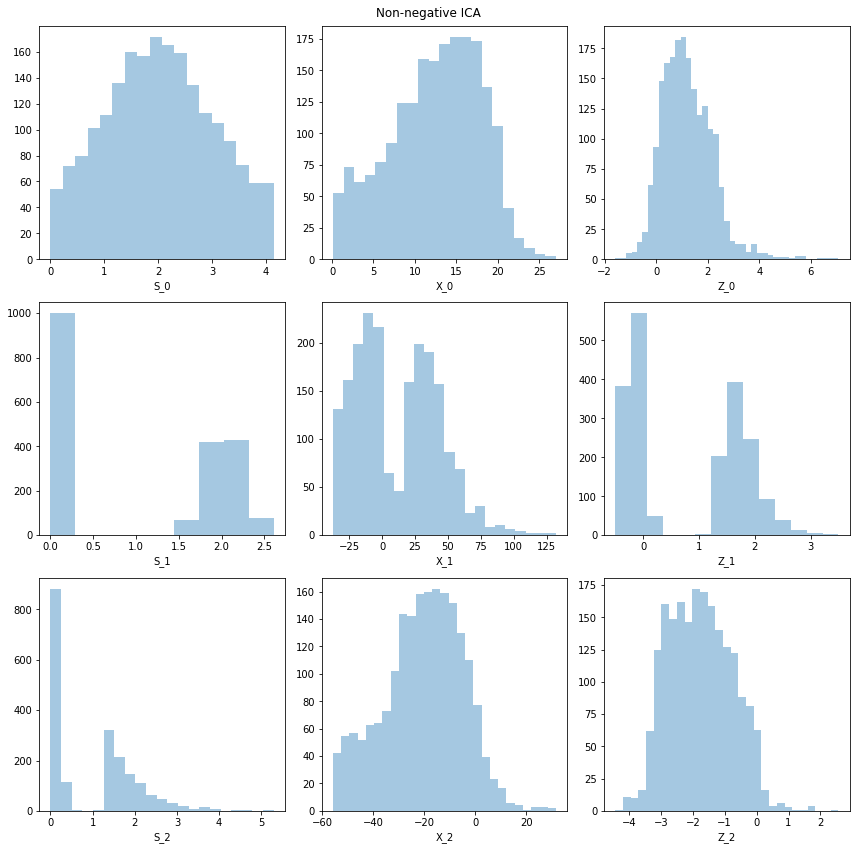

In [23]:
Z = whiten(X)
plot_ica_reconstruction([S, X, Z], labels=['S', 'X', 'Z'])

In [24]:
Y, W, Z, _ = run_nn_ica(X, t_tol=1e-2, i_max=5e5, print_all=5000)

i = 0, t_max = 4477.75, ixs = [0, 2], #negative = 2928
i = 5000, t_max = 85.07, ixs = [0, 2], #negative = 776
i = 10000, t_max = 114.84, ixs = [0, 2], #negative = 768
i = 15000, t_max = 143.49, ixs = [0, 2], #negative = 761
i = 20000, t_max = 99.32, ixs = [1, 2], #negative = 701
i = 25000, t_max = 139.09, ixs = [1, 2], #negative = 557
i = 30000, t_max = 100.79, ixs = [1, 2], #negative = 618
i = 35000, t_max = 135.75, ixs = [1, 2], #negative = 443
i = 40000, t_max = 89.63, ixs = [0, 2], #negative = 767
i = 45000, t_max = 116.01, ixs = [0, 2], #negative = 760
i = 50000, t_max = 88.30, ixs = [1, 2], #negative = 748
i = 55000, t_max = 87.40, ixs = [1, 2], #negative = 657
i = 60000, t_max = 85.67, ixs = [0, 2], #negative = 754
i = 65000, t_max = 74.59, ixs = [1, 2], #negative = 671
i = 70000, t_max = 91.79, ixs = [0, 2], #negative = 682
i = 75000, t_max = 65.44, ixs = [0, 2], #negative = 457
i = 80000, t_max = 85.52, ixs = [0, 2], #negative = 454
i = 85000, t_max = 54.06, ixs = [0, 2], #neg

Let's check to see how well we are doing.

../nn_ica/main.py:335: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


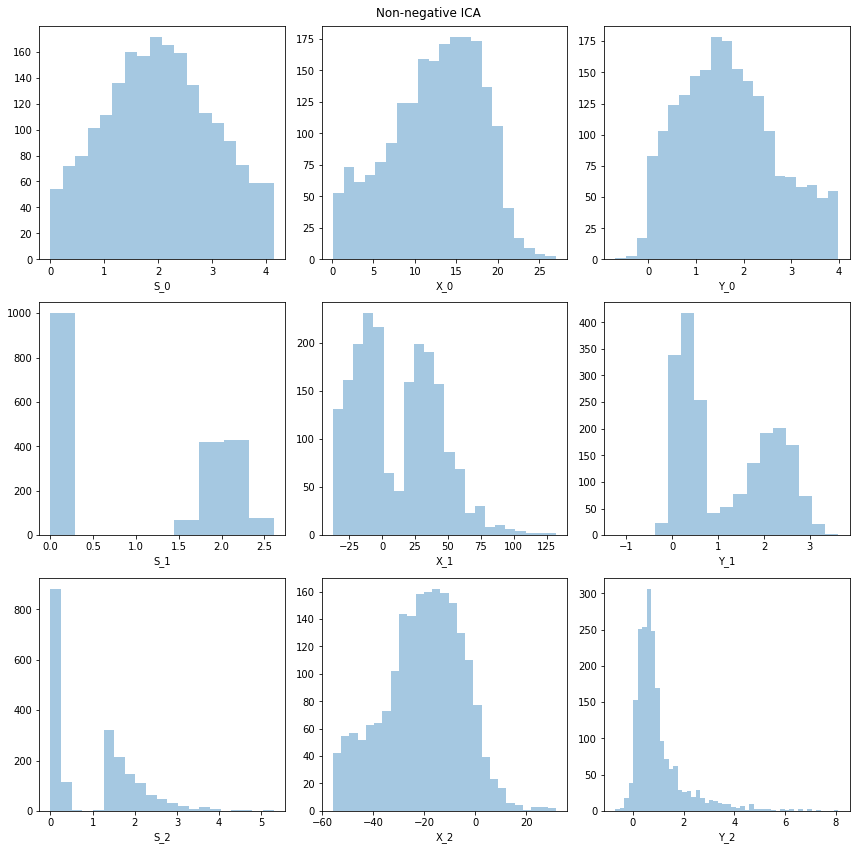

In [25]:
plot_ica_reconstruction([S, X, Y], labels=['S', 'X', 'Y'])

# More Sources - High Dimensional Data

Let's use some more sources to see how the algorithm can deal with higher dimensional data

In [26]:
def normal_pos(n_samples=1000, *args):
    
    a = np.random.normal(*args, n_samples*3)
    a = a[a>0]
    assert(a.shape[0] >= n_samples)
    
    return np.random.choice(a, size=n_samples, replace=False)

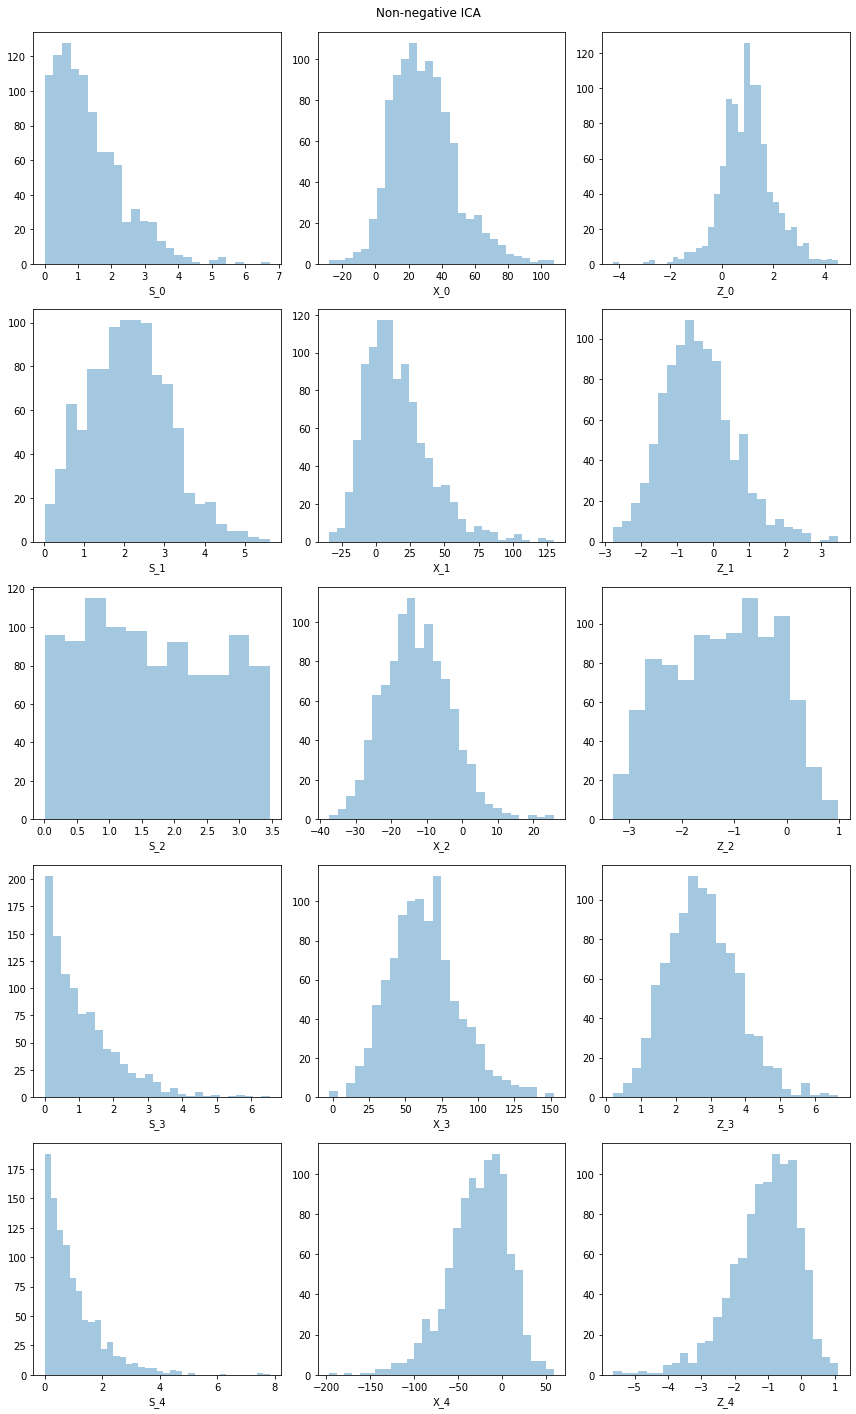

In [27]:
# set the seed
np.random.seed(2)

# create a list of source distributions
sources = []
sources.append(normal_pos(1000, 0, 1))
sources.append(normal_pos(1000, 10, 5))
sources.append(np.random.beta(1, 1, 1000))
sources.append(np.random.beta(1, 10, 1000))
sources.append(np.random.chisquare(2, 1000))
n = len(sources)

# concatenate and make unit variance
S = np.concatenate([s[None, :] for s in sources], axis=0)
S = np.diag(1/np.std(S, axis=1)) @ S

# create random matrix A and use it to mix the sources
A = np.random.normal(0, 10, (n, n))
X = A @ S

# whiten the data, and plot sources, mixed data and whitenend mixed data
Z = whiten(X)
plot_ica_reconstruction([S, X, Z], labels=['S', 'X', 'Z'])

Run NN-ICA

In [28]:
Y, _, _ , _ = run_nn_ica(X, t_tol=1e-1, i_max=5e5, print_all=5000)

i = 0, t_max = 3476.61, ixs = [2, 3], #negative = 2563
i = 5000, t_max = 24.21, ixs = [0, 3], #negative = 113
i = 10000, t_max = 14.96, ixs = [3, 4], #negative = 93
i = 15000, t_max = 20.58, ixs = [3, 4], #negative = 90
i = 20000, t_max = 27.16, ixs = [3, 4], #negative = 94
i = 25000, t_max = 10.74, ixs = [0, 3], #negative = 82
i = 30000, t_max = 6.25, ixs = [2, 4], #negative = 88
i = 35000, t_max = 7.99, ixs = [0, 4], #negative = 92
i = 40000, t_max = 3.80, ixs = [3, 4], #negative = 60
i = 45000, t_max = 7.15, ixs = [3, 4], #negative = 58
i = 50000, t_max = 11.87, ixs = [3, 4], #negative = 60
i = 55000, t_max = 17.46, ixs = [3, 4], #negative = 64
i = 60000, t_max = 23.50, ixs = [3, 4], #negative = 68
i = 65000, t_max = 4.72, ixs = [2, 4], #negative = 66
i = 70000, t_max = 6.59, ixs = [2, 4], #negative = 68
i = 75000, t_max = 5.48, ixs = [3, 4], #negative = 57
i = 80000, t_max = 10.14, ixs = [3, 4], #negative = 59
i = 85000, t_max = 16.49, ixs = [3, 4], #negative = 67
i = 90000, t_max 

This does indeed take quite a while. I think that for such low-dimensional data, there must be more efficient ways do handle this. The algorithm does not converge in half a million iterations for tolerance 1e-2.

Plot the final reconstruction.

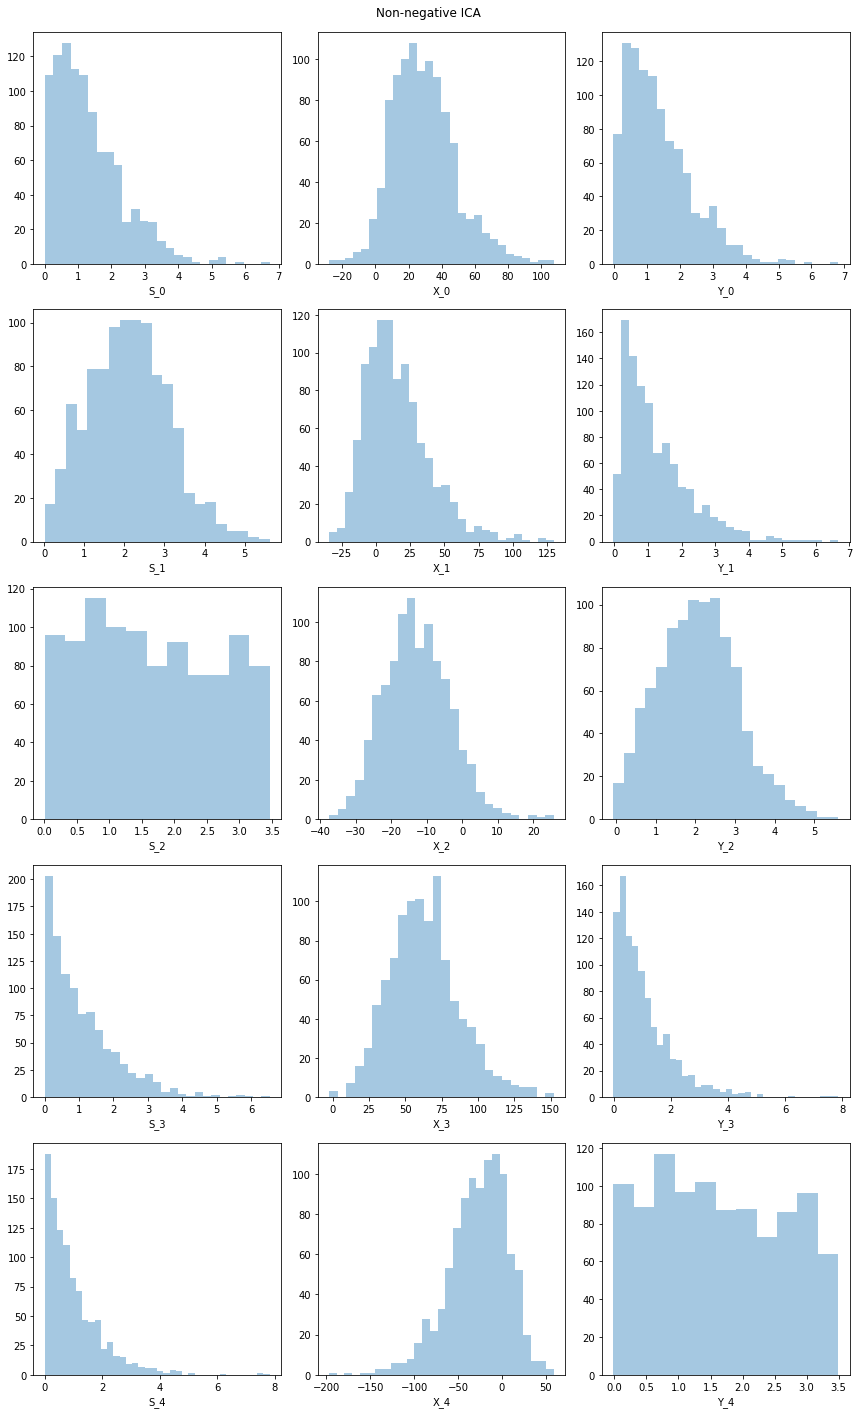

In [30]:
plot_ica_reconstruction([S, X, Y], labels=['S', 'X', 'Y'])

How many negative elements are still present in the reconstruction?

In [31]:
np.sum(Y<0)

21

How many is that in realtion to the total elements in Y?

In [32]:
100*(21 / (Y.shape[0]*Y.shape[1]))

0.42

So that's less than 0.5 percent. In comparison for X

In [33]:
np.sum(X<0)

2001

So that works fairly well indeed.